<a href="https://colab.research.google.com/github/Shelenadah/Data-science/blob/main/Copy_of_Copy_of_Machine_Learning_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING*** ***LIBRARIES***

In [ ]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics

READ DATA

In [ ]:
df = pd.read_csv("/content/HR Employee-Attrition.csv",encoding='latin1')

EDA

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.head()

,ÈÀAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ÈÀAge                    1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.dtypes

ÈÀAge                       int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
num_col = ['DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
'JobInvolvement',
'JobLevel',
'JobSatisfaction',
'MonthlyIncome',
'MonthlyRate',
'NumCompaniesWorked',
'PercentSalaryHike',
'PerformanceRating',
'RelationshipSatisfaction',
'StockOptionLevel',
'TotalWorkingYears',
'TrainingTimesLastYear',
'WorkLifeBalance',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion',
'YearsWithCurrManager',
'Attrition_yes']

In [ ]:
df.describe()

,ÈÀAge,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


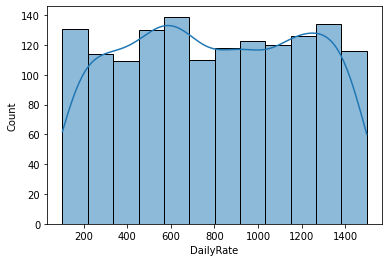

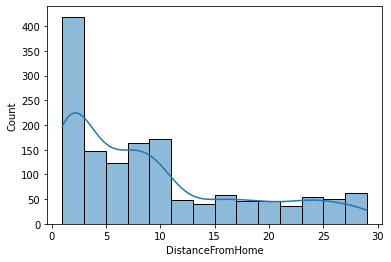

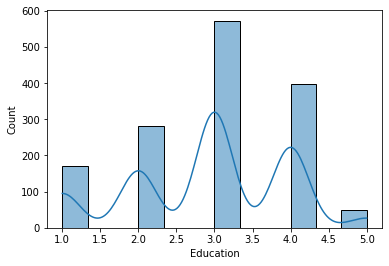

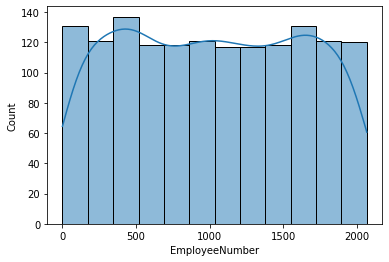

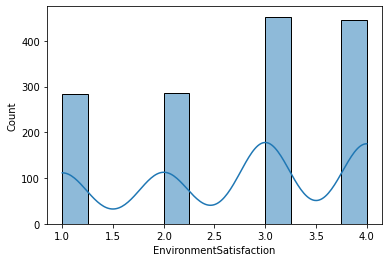

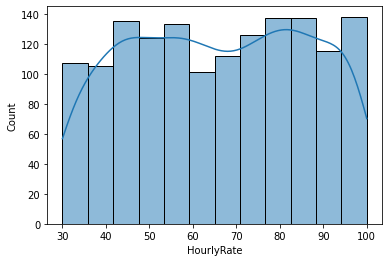

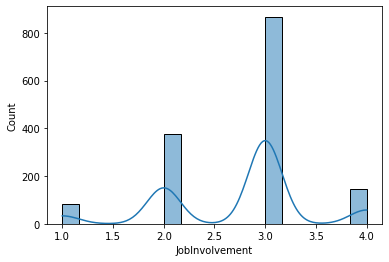

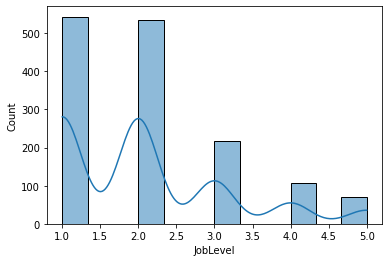

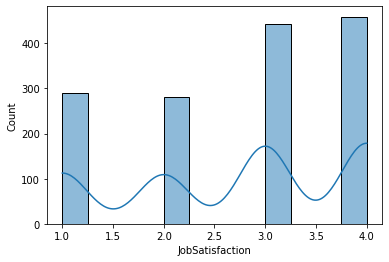

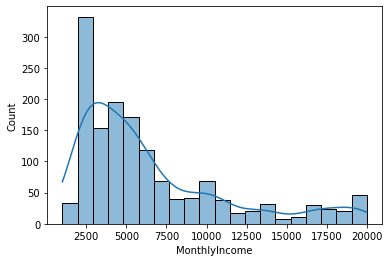

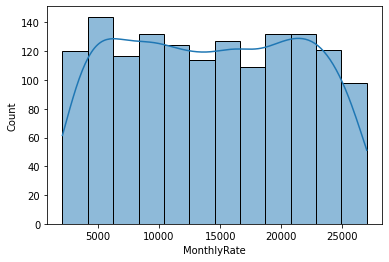

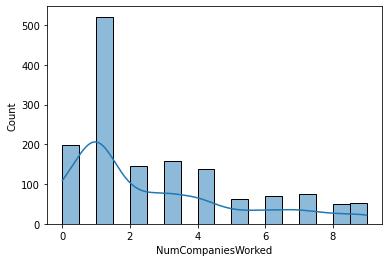

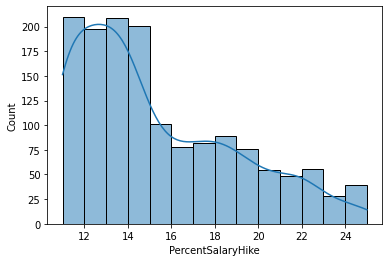

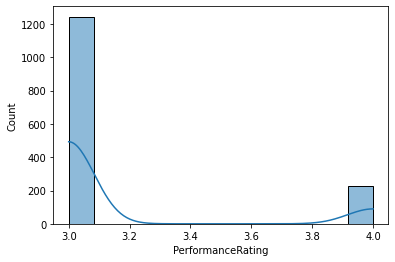

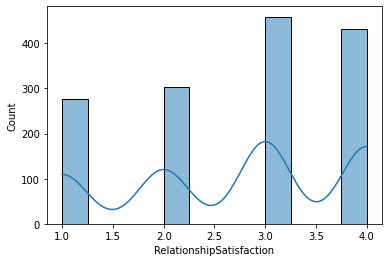

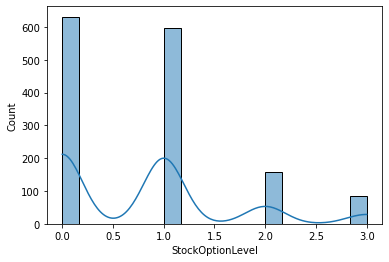

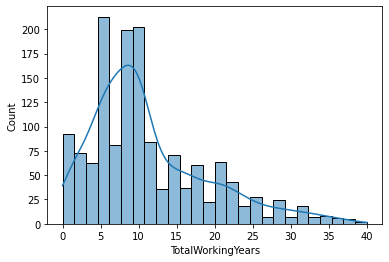

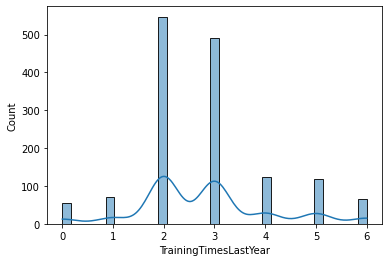

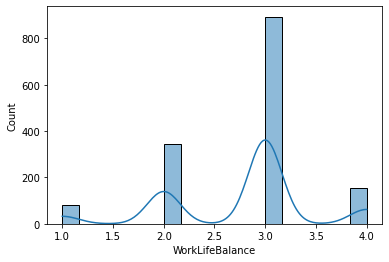

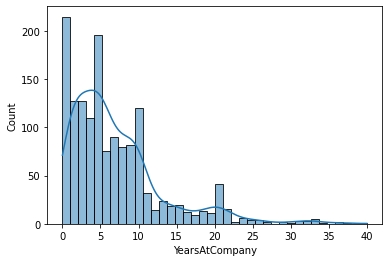

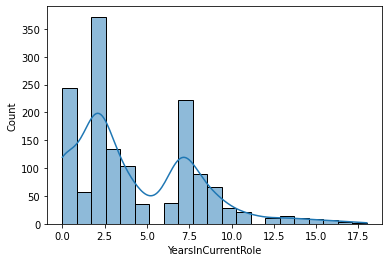

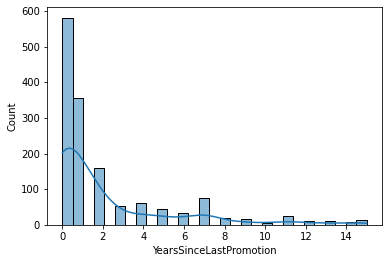

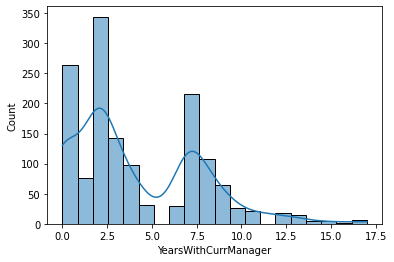

In [ ]:
for i in list(num_col[:-1]):
   sns.histplot(df[i],kde=True)
   plt.show()

In [ ]:
cat_col = ['Attrition',
'BusinessTravel',
'Department',
'EducationField',
'Gender',
'JobRole',
'MaritalStatus',
'Over18',
'OverTime']

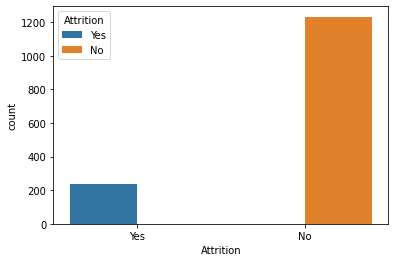

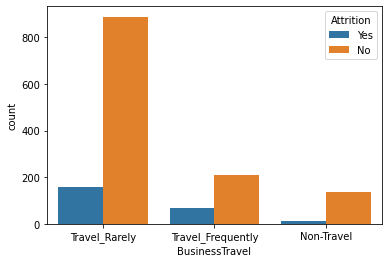

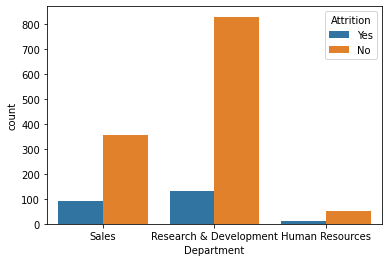

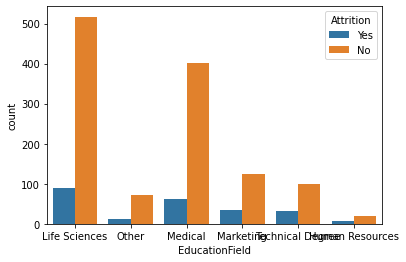

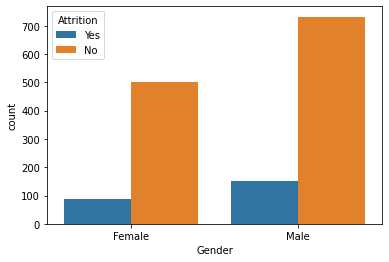

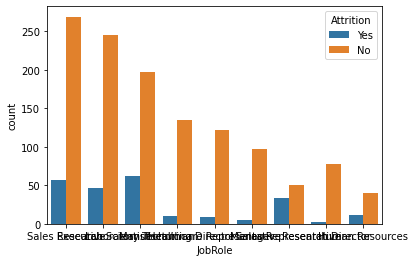

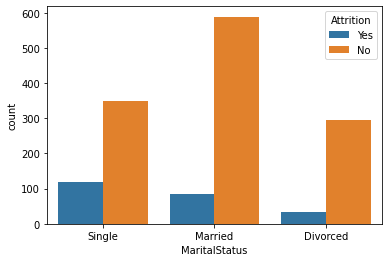

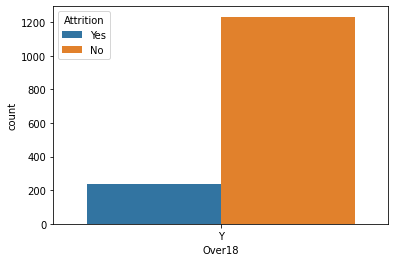

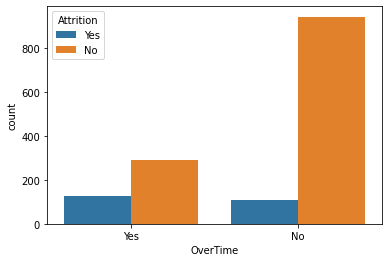

In [ ]:
#@title Default title text
for i in list(cat_col):
    sns.countplot(x=df[i],hue=df['Attrition'])
    plt.show()

In [ ]:
attrition_count = pd.DataFrame(df["Attrition"].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x7feb6b9e2580>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'Yes')])

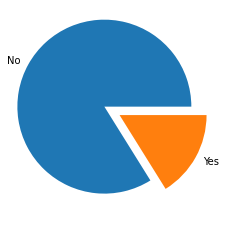

In [ ]:
plt.pie(attrition_count['Attrition'], labels = ['No', 'Yes'], explode = (0.2,0)) 

<AxesSubplot:>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


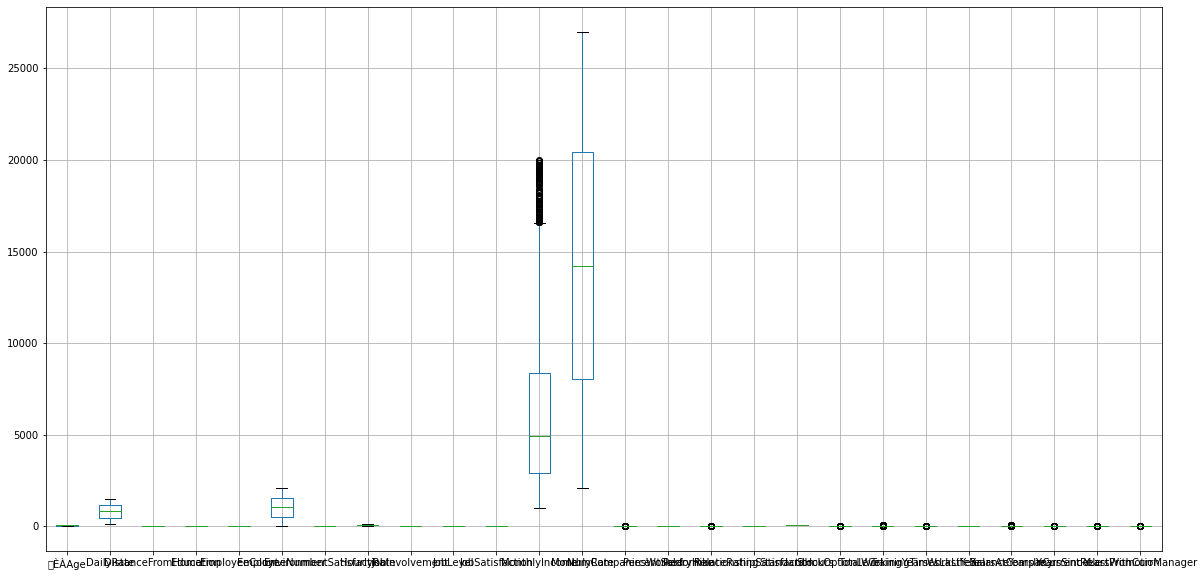

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()

<AxesSubplot:>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


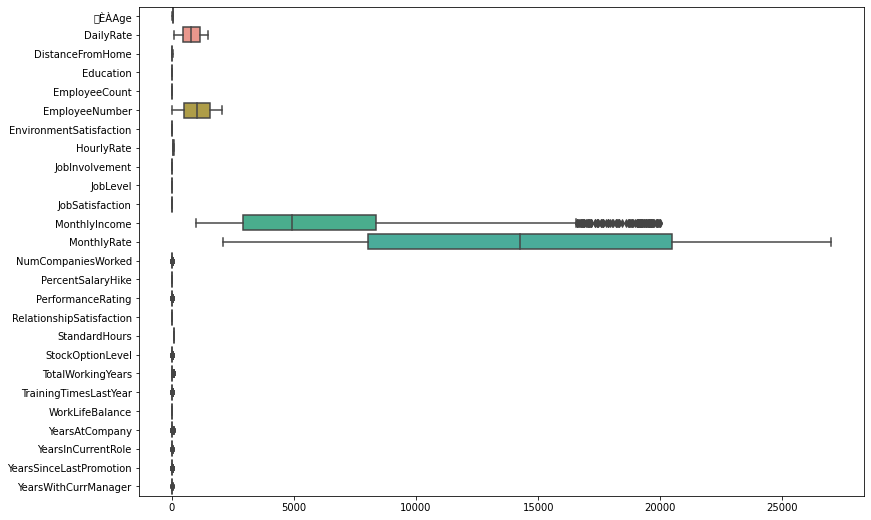

In [ ]:
plt.figure(figsize=(13,9))

sns.boxplot(data=df,orient='h')

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


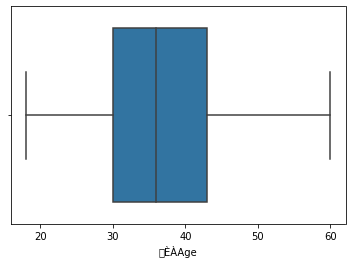

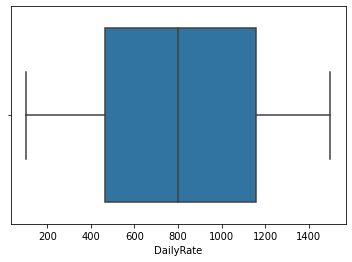

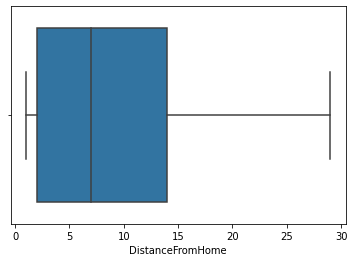

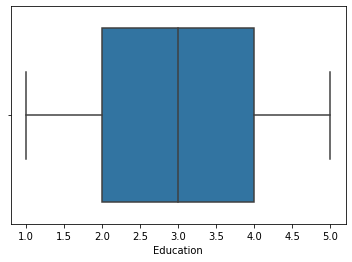

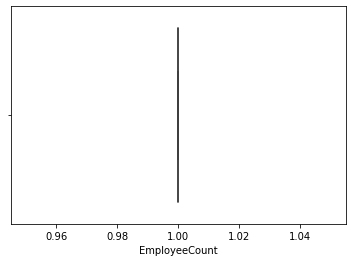

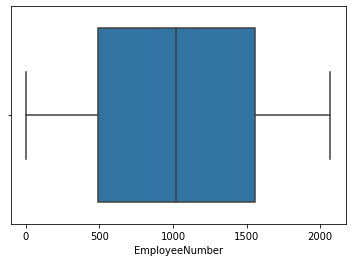

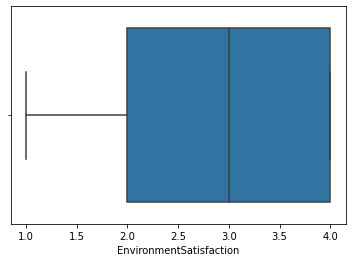

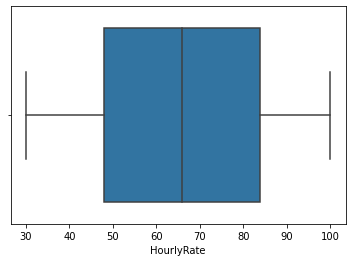

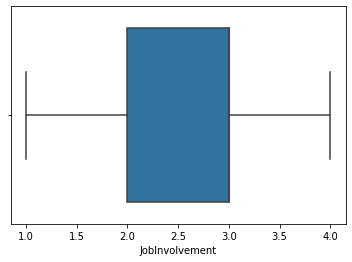

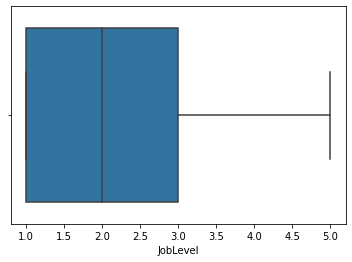

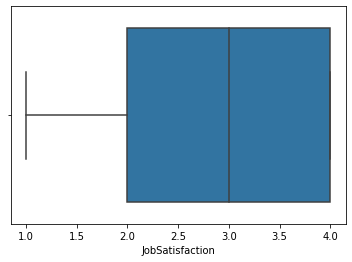

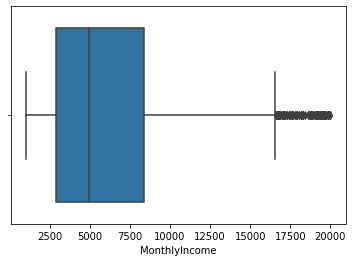

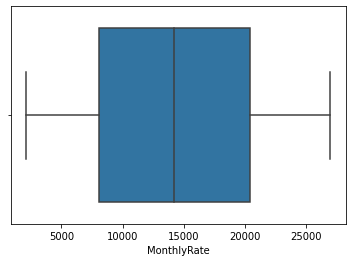

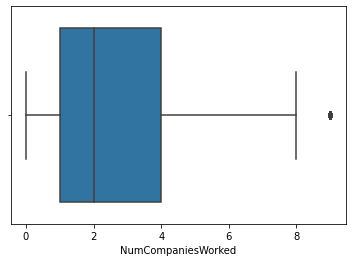

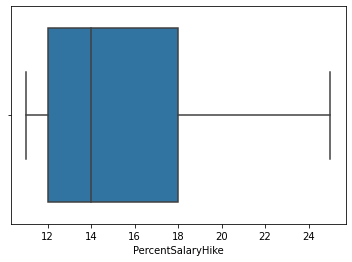

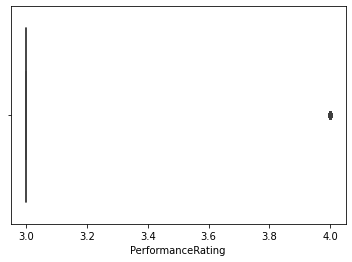

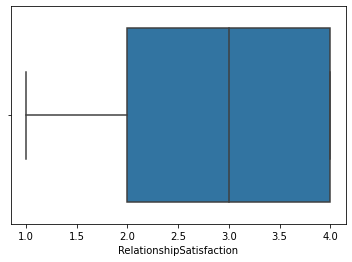

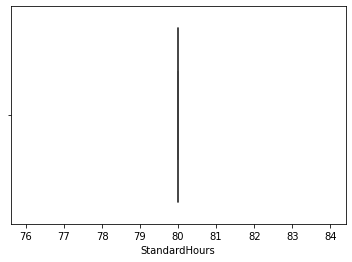

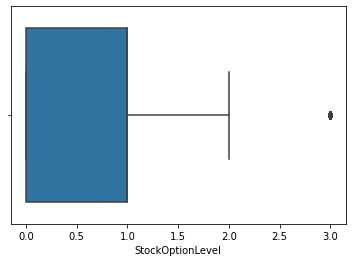

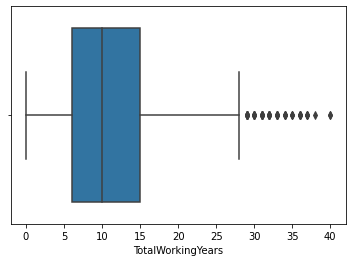

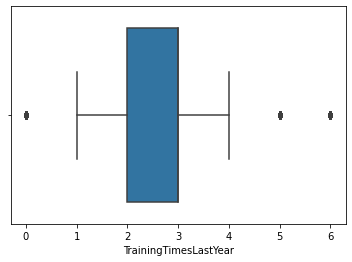

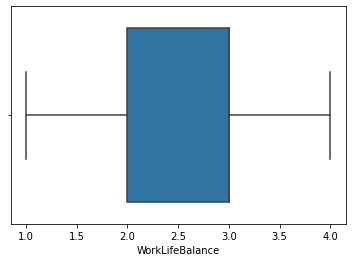

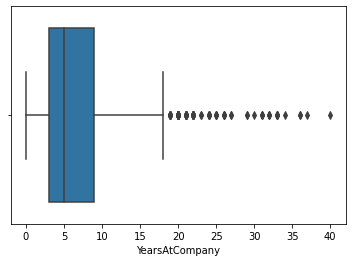

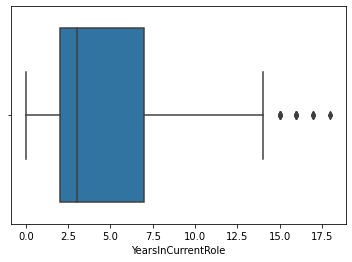

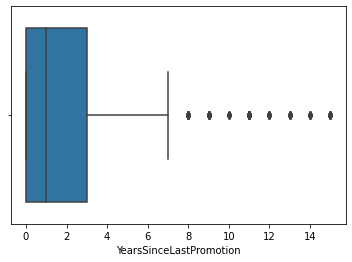

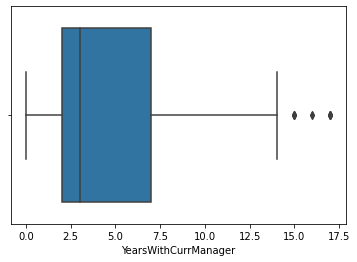

In [ ]:
for i in df.describe().columns:
    sns.boxplot(x=df[i])
    plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:660: UserWarning: Glyph 149 (\x95) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]


<AxesSubplot:>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


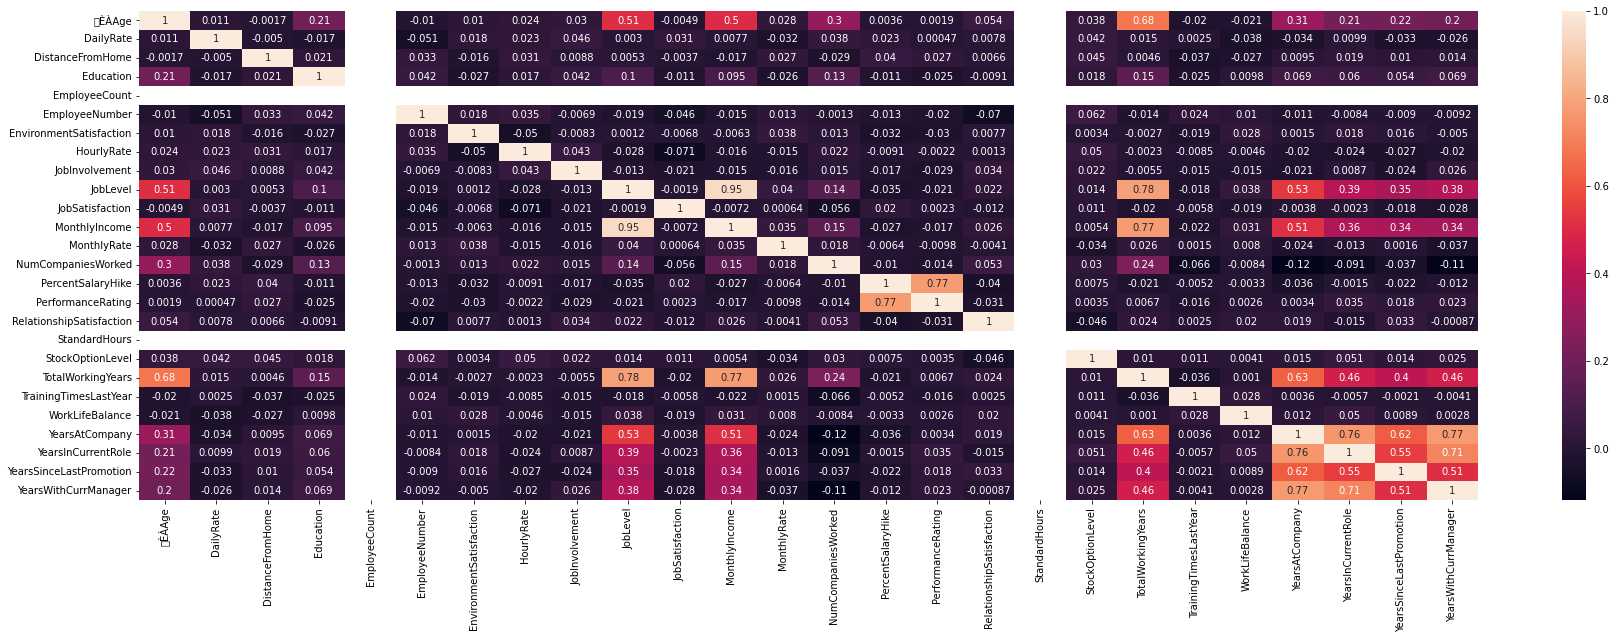

In [ ]:
plt.figure(figsize=(30,9))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop (columns =["EmployeeCount", 'EmployeeNumber' ,'StandardHours', 'Over18'],  axis=1, inplace=True)

In [ ]:
df.head()

,ÈÀAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:660: UserWarning: Glyph 149 (\x95) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]


<AxesSubplot:>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


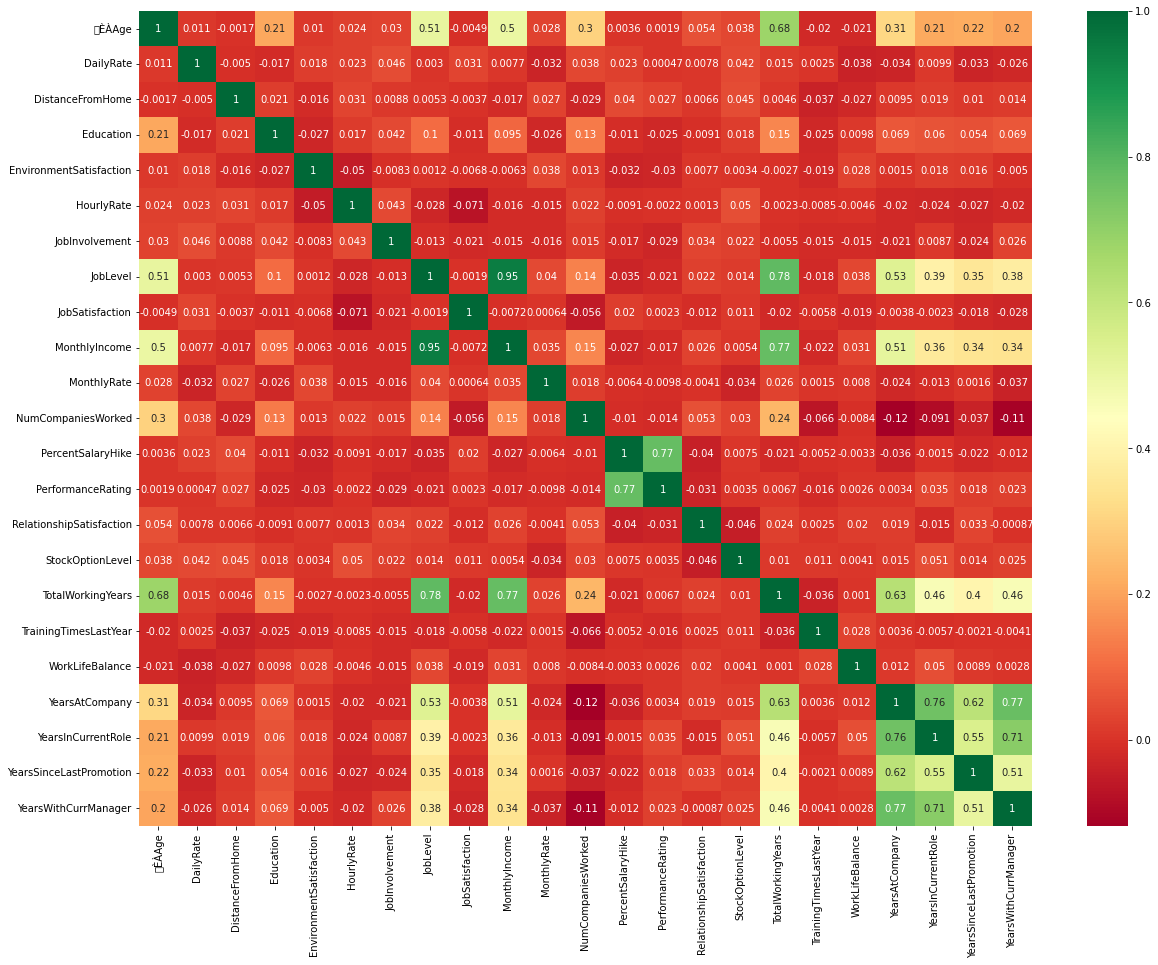

In [ ]:

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

Labelling encoding

In [ ]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [ ]:
len(object_col)

7

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)
df["Gender"] = label.fit_transform(df.Gender)
df["BusinessTravel"] = label.fit_transform(df.BusinessTravel)
df["Department"] = label.fit_transform(df.Department)
df["EducationField"] = label.fit_transform(df.EducationField)
df["JobRole"] = label.fit_transform(df.JobRole)
df["MaritalStatus"] = label.fit_transform(df.MaritalStatus)
df["OverTime"] = label.fit_transform(df.OverTime)

In [ ]:
df.describe()

,ÈÀAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:660: UserWarning: Glyph 149 (\x95) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]


<AxesSubplot:>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 149 (\x95) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


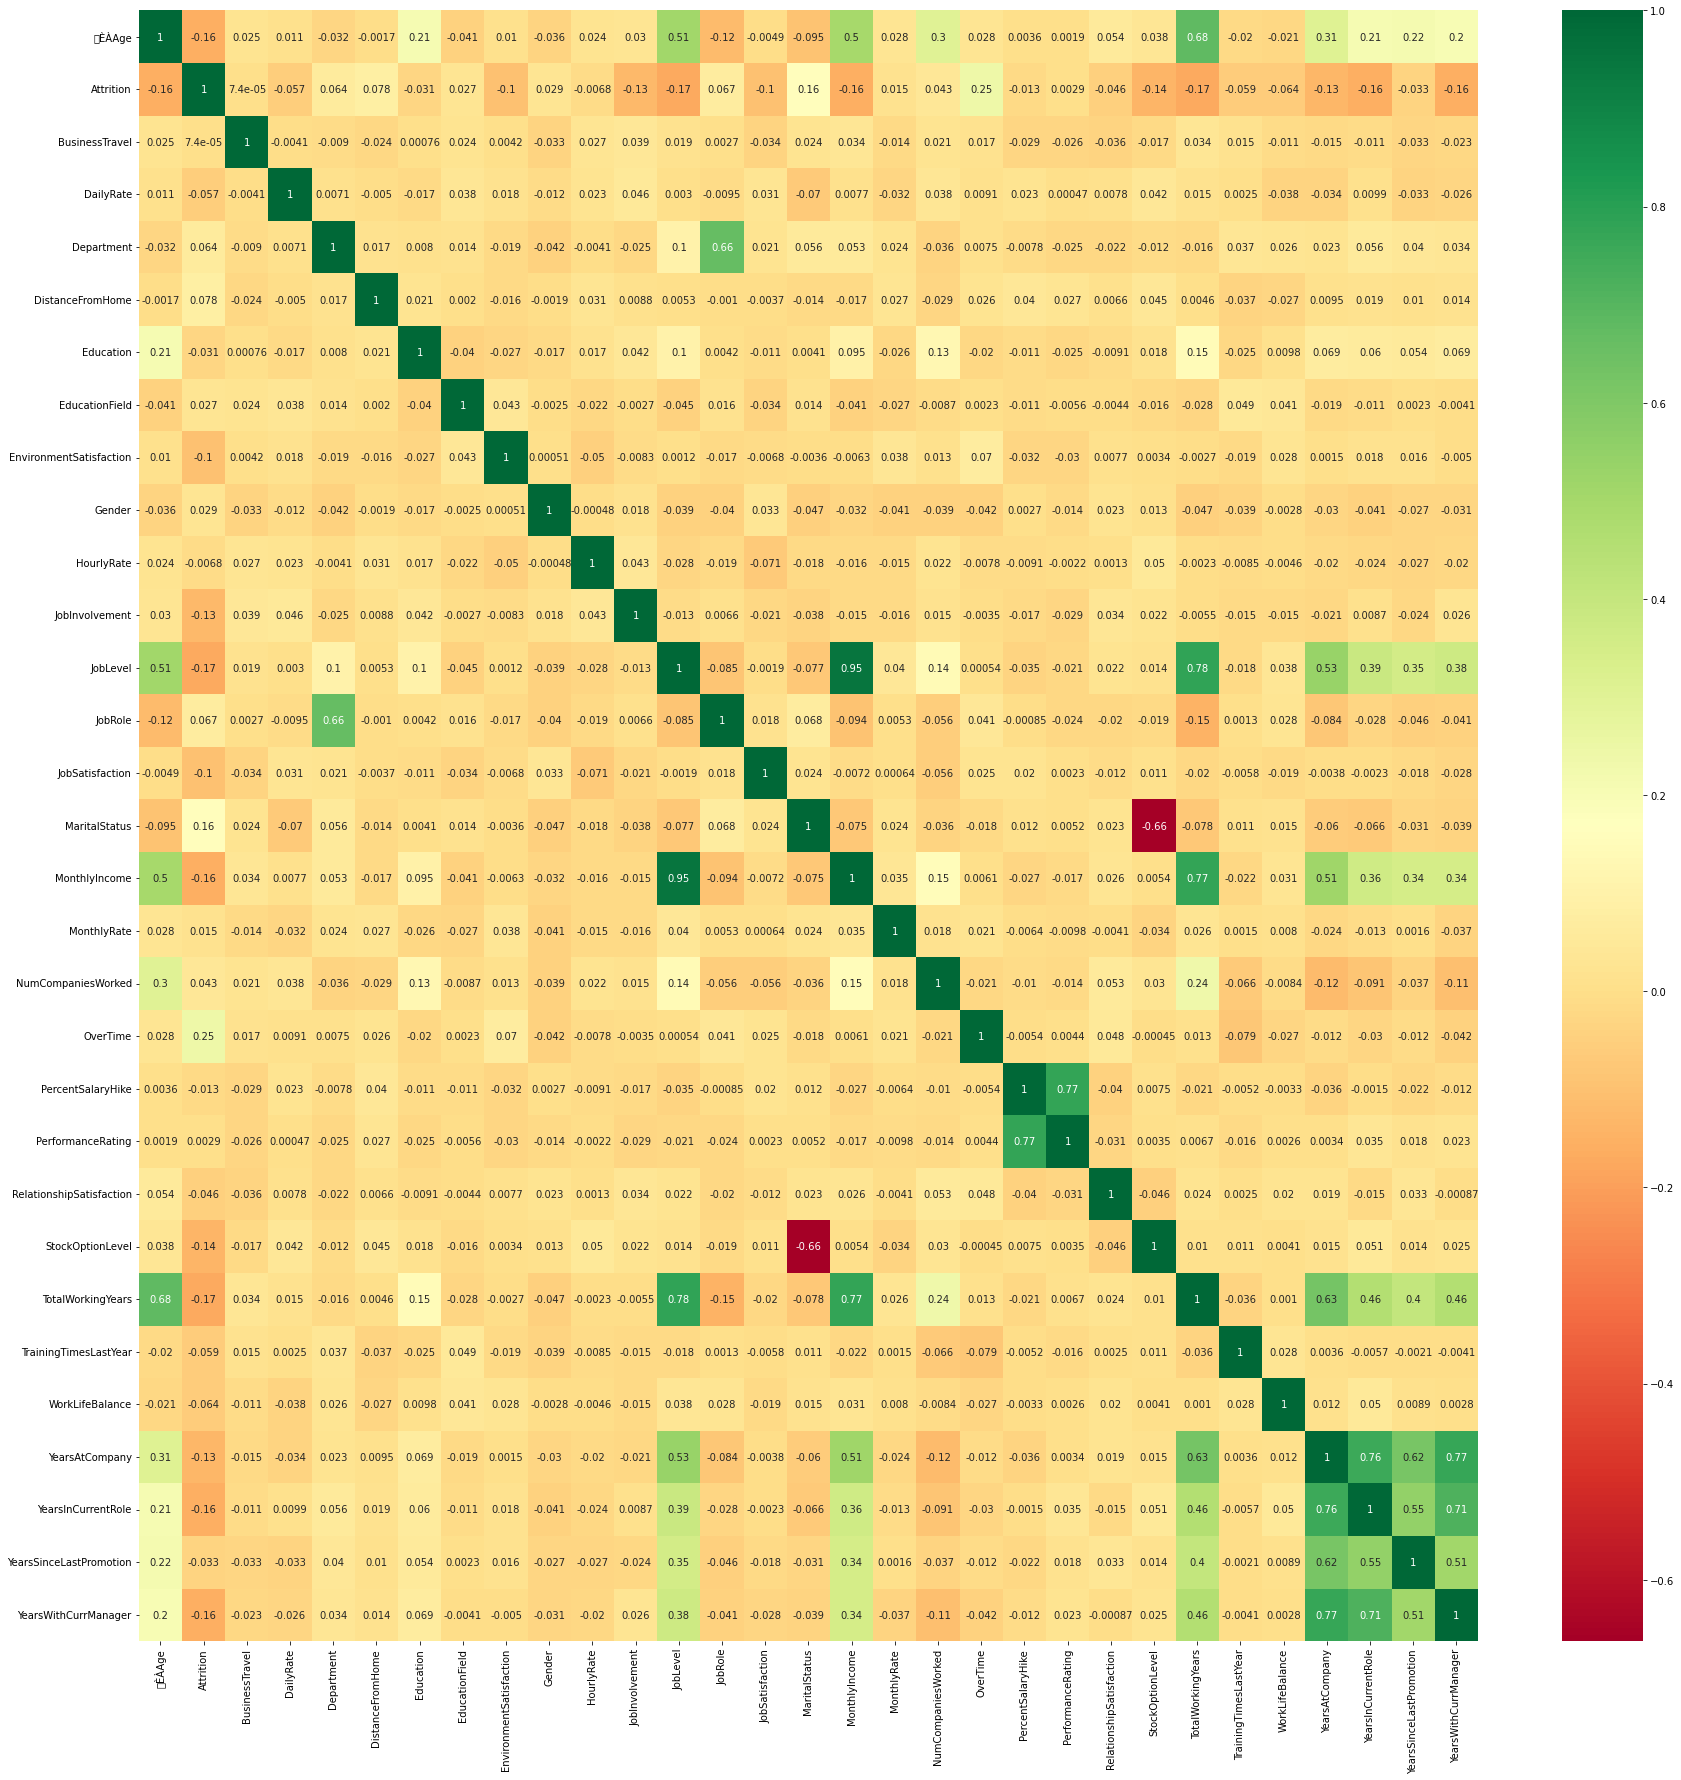

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [ ]:
df.shape

(1470, 31)

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [ ]:
X_test
print(X.shape,X_train.shape,X_test.shape)

(1470, 30) (1029, 30) (441, 30)


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
df.dtypes

ÈÀAge                      int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [ ]:
 print(X.shape,X_train.shape,X_test.shape)

(1470, 30) (1029, 30) (441, 30)


### **Logistic** regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver='liblinear')

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
result_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_2

,Actual,Predicted
397,0,0
832,0,0
483,0,0
456,0,0
1342,0,0
...,...,...
416,0,0
1098,0,0
514,1,1
1442,1,0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8684807256235828
Precision: 0.8095238095238095
Recall: 0.23943661971830985


Support Vector Machine

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
train_predict=model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(y_train, train_predict))
print("Precision on training data:", metrics.precision_score(y_train, train_predict))
print("Recall on training data:", metrics.recall_score(y_train, train_predict))

Accuracy on training data:  0.8503401360544217
Precision on training data: 0.6428571428571429
Recall on training data: 0.16265060240963855


In [ ]:
train_predict=model.predict(X_test)
print("Accuracy on training data: ", metrics.accuracy_score(y_train, train_predict))
print("Precision on training data:", metrics.precision_score(y_train, train_predict))
print("Recall on training data:", metrics.recall_score(y_train, train_predict))